<a href="https://colab.research.google.com/github/olupy/ml-models/blob/main/pm_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/200
56/56 [==============================] - 1s 5ms/step - loss: 46811.9688 - val_loss: 50421.8555
Epoch 2/200
56/56 [==============================] - 0s 3ms/step - loss: 44691.5039 - val_loss: 46431.1211
Epoch 3/200
56/56 [==============================] - 0s 3ms/step - loss: 38550.6992 - val_loss: 37461.9531
Epoch 4/200
56/56 [==============================] - 0s 3ms/step - loss: 29057.5234 - val_loss: 27661.5020
Epoch 5/200
56/56 [==============================] - 0s 2ms/step - loss: 21522.3711 - val_loss: 21639.5137
Epoch 6/200
56/56 [==============================] - 0s 2ms/step - loss: 17729.6621 - val_loss: 18935.4707
Epoch 7/200
56/56 [==============================] - 0s 3ms/step - loss: 16128.5361 - val_loss: 17565.6406
Epoch 8/200
56/56 [==============================] - 0s 3ms/step - loss: 15236.3516 - val_loss: 16682.1797
Epoch 9/200
56/56 [==============================] - 0s 2ms/step - loss: 14550.7695 - val_loss: 15938.8789
Epoch 10/200
56/56 [=================

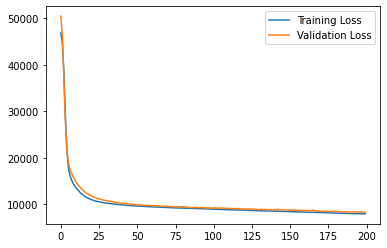

14/14 [==============================] - 0s 1ms/step


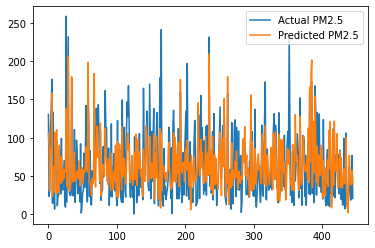

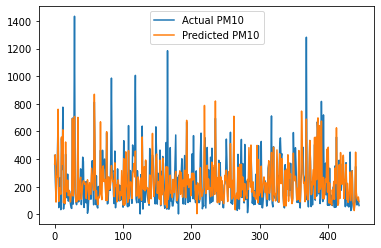

In [6]:
import pandas as pd
import numpy as np
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel(io.BytesIO(uploaded['JanData.xlsx']))

# Remove the first and last columns
df = df.iloc[:, 1:-2]

# Drop rows with missing values
df = df.dropna()

# Split the dataset into features and target variables
X = df.drop(['pm25', 'pm10'], axis=1)
y = df[['pm25', 'pm10']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the testing set
mse = model.evaluate(X_test, y_test)
print('Mean Squared Error:', mse)


# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Plot the actual and predicted values
plt.plot(y_test['pm25'].values, label='Actual PM2.5')
plt.plot(y_pred[:,0], label='Predicted PM2.5')
plt.legend()
plt.show()

plt.plot(y_test['pm 10'].values, label='Actual PM10')
plt.plot(y_pred[:,1], label='Predicted PM10')
plt.legend()
plt.show()

Best SVM model: SVR(C=10, gamma=0.1)


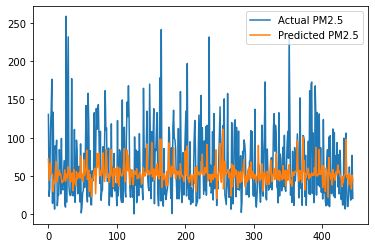

<Figure size 432x288 with 0 Axes>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
import matplotlib.pyplot as plt
# Load the Excel file
df = pd.read_excel(io.BytesIO(uploaded['JanData.xlsx']))


# Remove the first and last columns
df = df.iloc[:, 1:-1]

# Drop rows with missing values
df = df.dropna()

# Split the dataset into features and target variables
X = df.drop(['pm25', 'pm10'], axis=1)
y = df['pm25'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a parameter grid to search over
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}

# Create an SVM model
svm = SVR(kernel='rbf')

# Create a GridSearchCV object to search over the parameter grid
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best SVM model and print its hyperparameters
best_svm = grid_search.best_estimator_
print('Best SVM model:', best_svm)

# Make predictions on the testing set
y_pred = best_svm.predict(X_test)

# Plot the actual and predicted values
plt.plot(y_test, label='Actual PM2.5')
plt.plot(y_pred, label='Predicted PM2.5')
plt.legend()
plt.show()
plt.savefig('pm2.5levels.png')

Best SVM model: SVR(C=10, gamma=0.1)


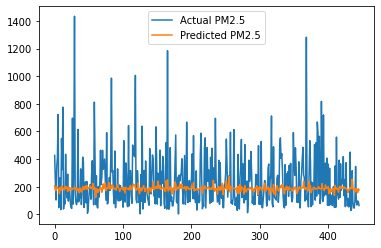

<Figure size 432x288 with 0 Axes>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
import matplotlib.pyplot as plt
# Load the Excel file
df = pd.read_excel(io.BytesIO(uploaded['JanData.xlsx']))


# Remove the first and last columns
df = df.iloc[:, 1:-1]

# Drop rows with missing values
df = df.dropna()

# Split the dataset into features and target variables
X = df.drop(['pm25', 'pm10'], axis=1)
y = df['pm10'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a parameter grid to search over
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}

# Create an SVM model
svm = SVR(kernel='rbf')

# Create a GridSearchCV object to search over the parameter grid
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best SVM model and print its hyperparameters
best_svm = grid_search.best_estimator_
print('Best SVM model:', best_svm)

# Make predictions on the testing set
y_pred = best_svm.predict(X_test)

# Plot the actual and predicted values
plt.plot(y_test, label='Actual PM2.5')
plt.plot(y_pred, label='Predicted PM2.5')
plt.legend()
plt.show()
plt.savefig('pm10levels.png')